# Baseball Case Study

Problem Statement:


This dataset utilizes data from 2014 Major League Baseball seasons in order to develop an algorithm that predicts the number of wins for a given team in the 2015 season based on several different indicators of success. There are 16 different features that will be used as the inputs to the machine learning and the output will be a value that represents the number of wins. 

About the columns data
1. R: Runs,
2. AB: At Bats
3. H: Hits
4. 2B: Doubles
5. 3B: Triples
6. HR: Homeruns
7. BB: Walks
8. SO: Strikeouts
9. SB: Stolen Bases
10. RA: Runs Allowed
11. ER: Earned Runs
12. ERA: Earned Run Average (ERA)
13. CG: Shutouts
14. SV: Saves,
15. SV: Complete Games
16. E: Errors
17. W: Win

1. Input features: Runs, At Bats, Hits, Doubles, Triples, Homeruns, Walks, Strikeouts, Stolen Bases, Runs Allowed, 
Earned Runs, Earned Run Average (ERA), Shutouts, Saves, Complete Games and Errors
2. Output: Number of predicted wins (W)

# Importing the data

In [17]:
#importing the required libraries
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [3]:
#reading the dataset
df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/baseball.csv")
df

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,93,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34,88
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97


In [4]:
df.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


In [6]:
#checking the shape of the dataframe
df.shape

(30, 17)

<AxesSubplot:>

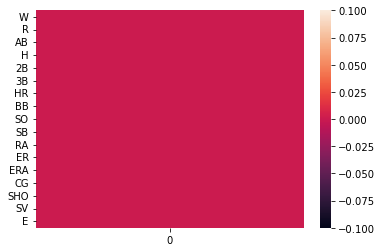

In [7]:
#checking the null value along with heatmap
import seaborn as sns
sns.heatmap(df.isnull().sum().to_frame()) #to_frame () function is utilized to change over the given arrangement item to a datagram.

In [8]:
#basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


No need to change the datatype they are appropriate so we can skip the step of data conversion.
Now directly let's see the Visualization.

In [14]:
#describing the dataset
df.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


In [15]:
# Target variable is W
df.W.unique()

array([ 95,  83,  81,  76,  74,  93,  87,  80,  78,  88,  86,  85,  68,
       100,  98,  97,  64,  90,  71,  67,  63,  92,  84,  79], dtype=int64)

This is Regression problem so, we have to precit the total number of wins by a team

<AxesSubplot:xlabel='W', ylabel='Density'>

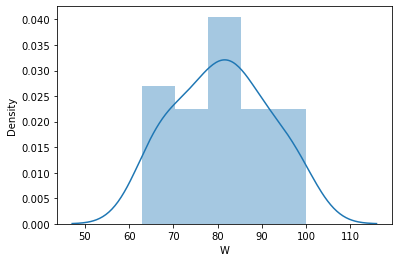

In [18]:
#Analyse Target variable first
sns.distplot(df.W)

The above figure seems like normal distribution

<AxesSubplot:xlabel='W', ylabel='Count'>

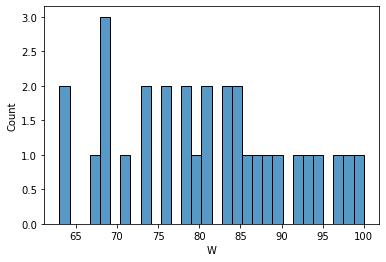

In [19]:
sns.histplot(df.W, bins=30)

The Wins column depends on various features, we need to find the relation.

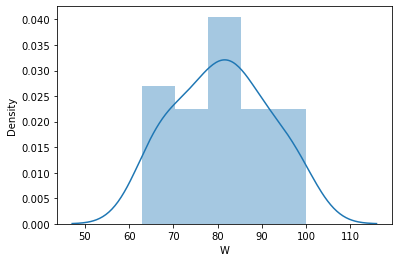

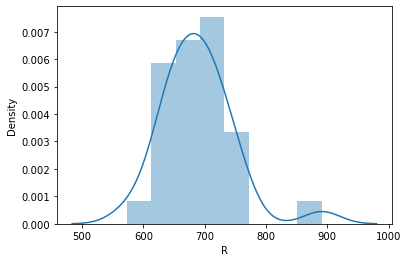

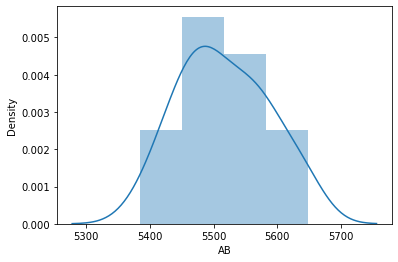

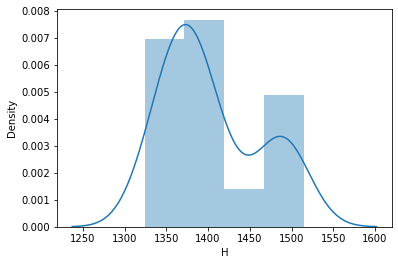

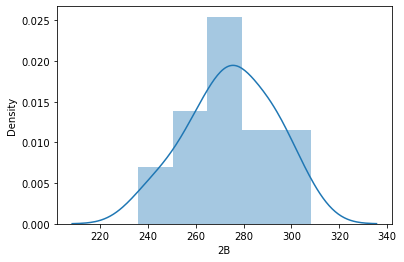

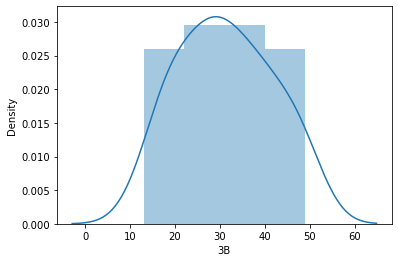

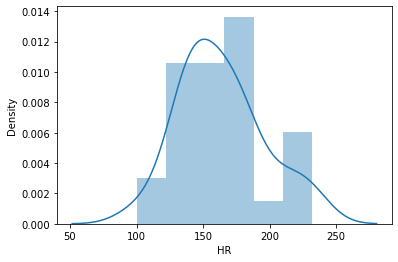

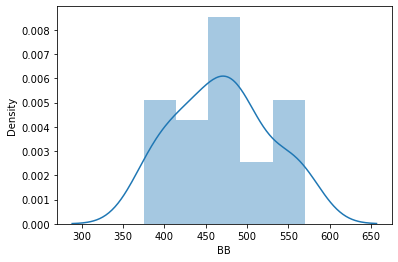

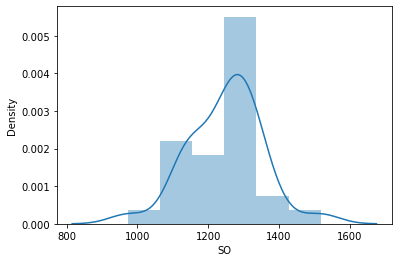

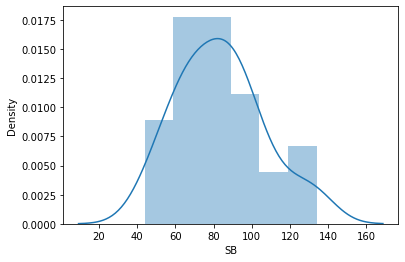

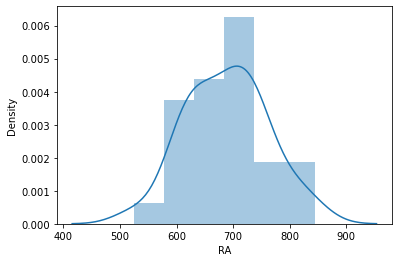

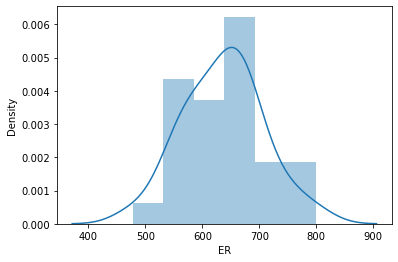

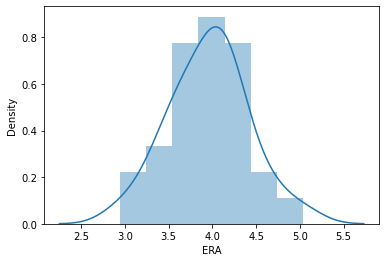

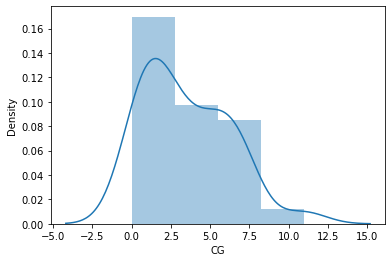

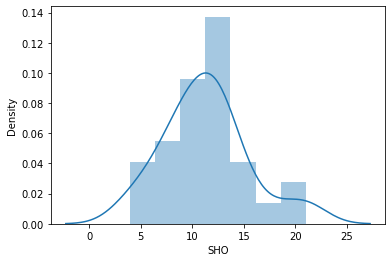

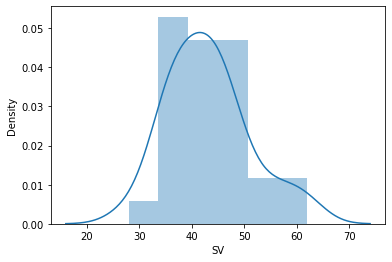

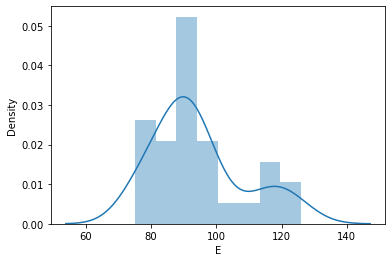

In [20]:
#First of all lets see the distrivution of all features

for i in df.columns:
    sns.distplot(df[i])
    plt.show()

R  -  is right skewed data and 2 peaks ; AB  - kind of normal distribution ; H - Bipolar distributed data ; 2B  - lil bit left skewed data ; 3B  - kind of normal distribution ; HR - some skewness on both side ; BB  - also have sort of skewness on both side ; SO  - skewed data on both sides ; SB right side skewed ; RA - skewed data ; ER  - lil skewed data ; ERA - Skewed on both side ; CG - not normal distributed data ; SHO= not noprmal distributed ; SV - right skewed ; E - Bipolar data

# Correlation

In [21]:
df.corr()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
W,1.000000,0.430751,-0.087947,0.037612,0.427797,-0.251118,0.307407,0.484342,0.111850,-0.157234,-0.812952,-0.809435,-0.819600,0.080533,0.471805,0.666530,-0.089485
R,0.430751,1.000000,0.319464,0.482856,0.560084,-0.070072,0.671283,0.402452,-0.054726,0.081367,-0.041623,-0.041245,-0.049281,0.232042,-0.103274,-0.096380,-0.023262
AB,-0.087947,0.319464,1.000000,0.739122,0.453370,0.435422,-0.066983,-0.136414,-0.106022,0.372618,0.316010,0.309686,0.255551,-0.080876,-0.197321,-0.106367,0.316743
H,0.037612,0.482856,0.739122,1.000000,0.566847,0.478694,-0.090855,-0.118281,-0.398830,0.413444,0.224324,0.252489,0.231172,0.147955,-0.145559,-0.130371,-0.033173
2B,0.427797,0.560084,0.453370,0.566847,1.000000,0.220490,0.056292,0.302700,-0.150752,0.195027,-0.218160,-0.235531,-0.254854,0.306675,0.057998,0.171576,0.105754
3B,-0.251118,-0.070072,0.435422,0.478694,0.220490,1.000000,-0.430915,-0.454949,-0.141196,0.457437,0.314125,0.340225,0.330951,-0.065898,-0.041396,-0.142370,0.126678
HR,0.307407,0.671283,-0.066983,-0.090855,0.056292,-0.430915,1.000000,0.425691,0.359923,-0.136567,-0.103903,-0.085922,-0.090917,0.156502,-0.019119,-0.028540,-0.207597
BB,0.484342,0.402452,-0.136414,-0.118281,0.302700,-0.454949,0.425691,1.000000,0.233652,-0.098347,-0.416445,-0.452663,-0.459832,0.462478,0.426004,0.099445,-0.075685
SO,0.111850,-0.054726,-0.106022,-0.398830,-0.150752,-0.141196,0.359923,0.233652,1.000000,0.030968,-0.129745,-0.161612,-0.180368,-0.093418,0.237721,0.126297,0.155133
SB,-0.157234,0.081367,0.372618,0.413444,0.195027,0.457437,-0.136567,-0.098347,0.030968,1.000000,0.132290,0.143068,0.126063,-0.020783,-0.106563,-0.183418,0.079149


In [22]:
#checking the columns
df.columns

Index(['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E'],
      dtype='object')

In [23]:
df=df[[ 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E','W']]

<AxesSubplot:>

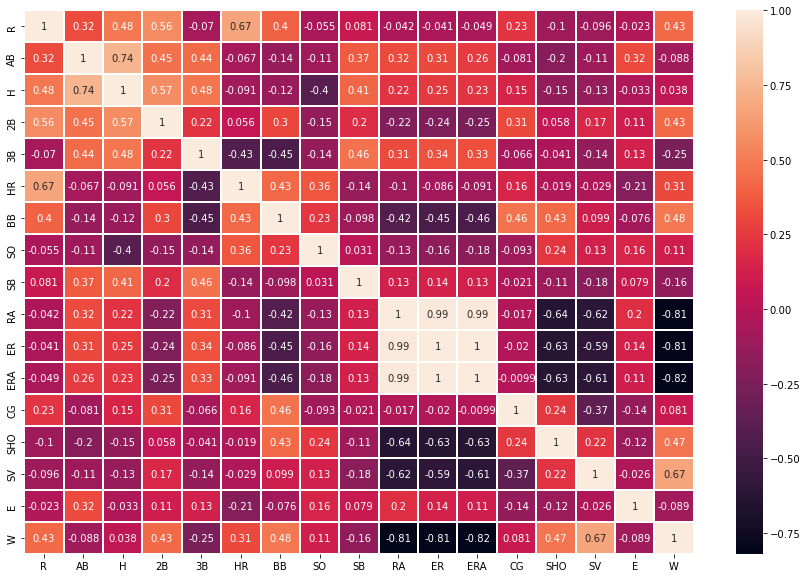

In [25]:
#heatmap of the correlated data
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True,linecolor='white',linewidths=.25)

Correlation analysis : First independent vs dependent

R,HR,2B,BB,SHO, SV  is good correlated with target variable (W)

AB, H, 3B, SO,SB,CG,E  are low correlated with target variable (+ and -)

RA, ER, ERA  are highly negative correlated, we have to further check to drop any of them.

RA, ER, ERA  are highly correlated to each other. these feature can bios the result. we have to take decicion on them.

AB and H are strong correlated to each other 74%

# EDA

<AxesSubplot:xlabel='R', ylabel='W'>

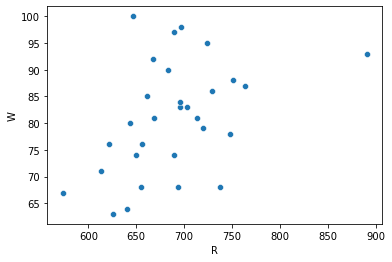

In [26]:
#Runs scored vs Win
sns.scatterplot('R','W',data=df)

 Run scored have positive graph with Wins,  more the run, more chances to Win

<AxesSubplot:xlabel='AB', ylabel='W'>

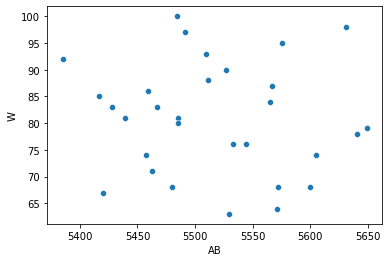

In [27]:
#AB vs Win

sns.scatterplot('AB','W',data=df)

Data distribution not in any directioon, low correlated with Win  .038, we can drop this feature, this is very low correelation. It will not help to 
predict the win.

<AxesSubplot:xlabel='2B', ylabel='W'>

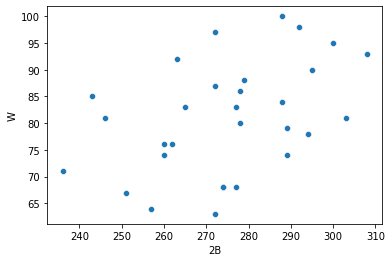

In [28]:
#2B vs WIN

sns.scatterplot('2B','W',data=df)

This is a Positive correlated graph. If there are more 2B, then there are more chances to win.

<AxesSubplot:xlabel='3B', ylabel='W'>

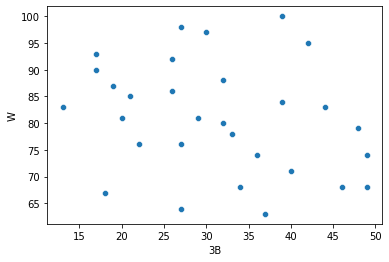

In [29]:
#3B vs WIN

sns.scatterplot('3B','W',data=df)

 This distributin is low correlated, it won't help to predict WIN more.

<AxesSubplot:xlabel='HR', ylabel='W'>

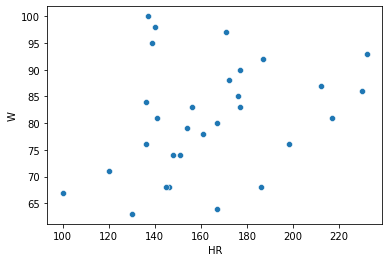

In [30]:
#HR vs WIN

sns.scatterplot('HR','W',data=df)

This one is positively correlated

<AxesSubplot:xlabel='BB', ylabel='W'>

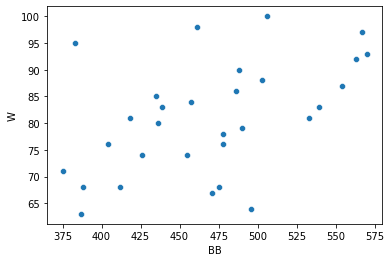

In [31]:
#BB vs win
sns.scatterplot('BB','W',data=df)

This is also positively correlated 

<AxesSubplot:xlabel='SO', ylabel='W'>

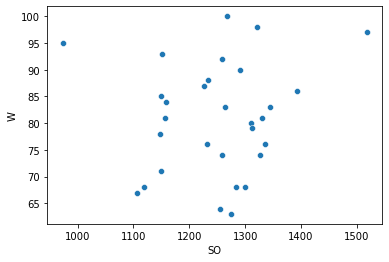

In [32]:
#SO vs WIN

sns.scatterplot('SO','W',data=df)

This is low positive correlated

<AxesSubplot:xlabel='SB', ylabel='W'>

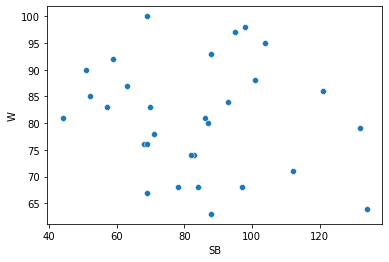

In [33]:
#SB vs win

sns.scatterplot('SB','W',data=df)

Negative low correlated

<AxesSubplot:xlabel='RA', ylabel='W'>

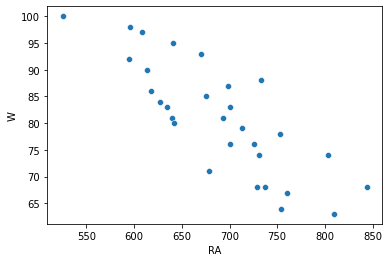

In [34]:
#RA vs win

sns.scatterplot('RA','W',data=df)

This is highly negative correlated

<AxesSubplot:xlabel='ER', ylabel='W'>

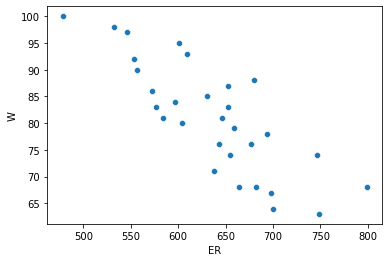

In [35]:
#ER vs Win

sns.scatterplot('ER','W',data=df)

This is highly negative correlated

<AxesSubplot:xlabel='ERA', ylabel='W'>

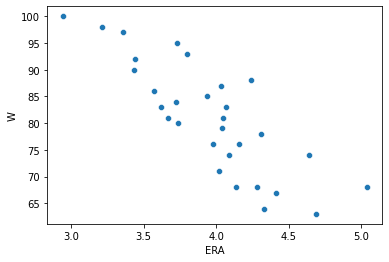

In [36]:
#ERA vs WIN

sns.scatterplot('ERA','W',data=df)

This is also highly negative correlated

<AxesSubplot:xlabel='CG', ylabel='W'>

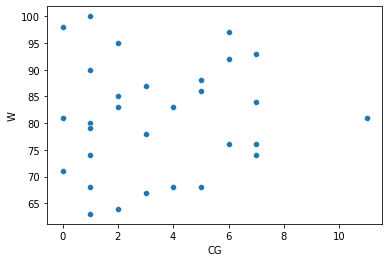

In [37]:
#CG vs WIN

sns.scatterplot('CG','W',data=df)

This is very low correlated

<AxesSubplot:xlabel='SHO', ylabel='W'>

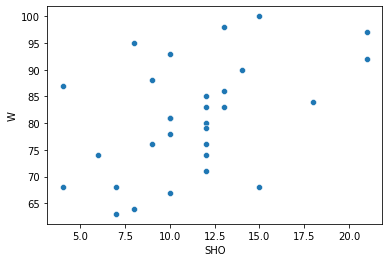

In [38]:
#SHO vs win

sns.scatterplot('SHO','W',data=df)


This is positively correlated

<AxesSubplot:xlabel='SV', ylabel='W'>

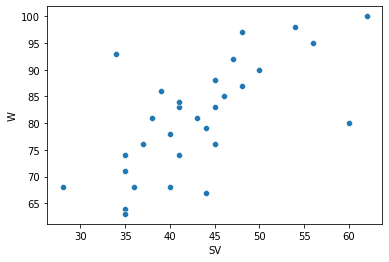

In [39]:
#SV vs win

sns.scatterplot('SV','W',data=df)

This is also positively correlated

<AxesSubplot:xlabel='E', ylabel='W'>

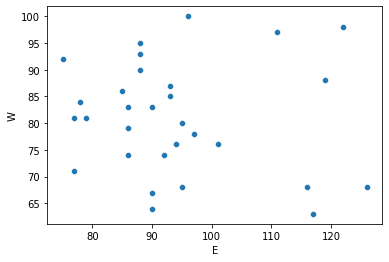

In [40]:
#E vs win

sns.scatterplot('E','W',data=df)

This is very low correlated

Conclusion: Within features some are very low correlated with target variable and some are highly negative correlated.

Also, multicolinearity is also available, some independent feature are highly correlated to each other

# Unique values

In [41]:
for i in df.columns:
    df[i].nunique()
    print("unique values of feature ",i, '= ',df[i].nunique())

unique values of feature  R =  28
unique values of feature  AB =  29
unique values of feature  H =  29
unique values of feature  2B =  22
unique values of feature  3B =  23
unique values of feature  HR =  27
unique values of feature  BB =  29
unique values of feature  SO =  29
unique values of feature  SB =  27
unique values of feature  RA =  30
unique values of feature  ER =  30
unique values of feature  ERA =  30
unique values of feature  CG =  9
unique values of feature  SHO =  12
unique values of feature  SV =  20
unique values of feature  E =  21
unique values of feature  W =  24


In [42]:
df.CG.unique()

array([ 2, 11,  7,  3,  0,  1,  5,  6,  4], dtype=int64)

<AxesSubplot:xlabel='R', ylabel='W'>

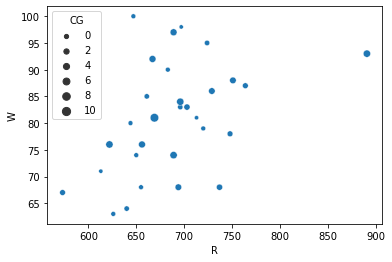

In [43]:
sns.scatterplot('R','W',size='CG',data=df)

<AxesSubplot:xlabel='CG', ylabel='W'>

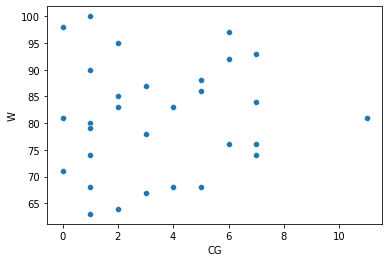

In [44]:
sns.scatterplot('CG','W',data=df)

Complete Game has no correlation with WIN, There are chances where you played complete game and not won all matches. 

A pitcher earns a complete game if he pitches the entire game for his team regardless of how long it lasts.

<AxesSubplot:xlabel='ER', ylabel='RA'>

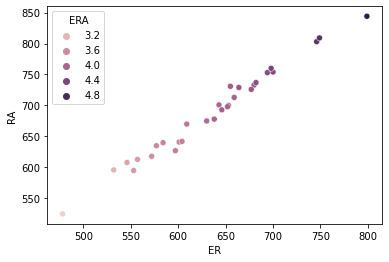

In [45]:
sns.scatterplot('ER', 'RA', hue='ERA',data=df)

Earned runs is the key counting statistic used in ERA, the most widely accepted barometer of a pitcher's success. If there are no errors or passed balls in a given inning or game, all the runs in that inning or game are earned runs.

RA and ER seems the same thing menas, RA - run scored by opponent and ER earned run allowed without any errors.

That's a very good correlation. Let's explore it more.

# VIF to find multicolinearity

In [46]:
#VIF is Variance Inflation Factor

In [47]:
v= df.drop('W', axis=1)
v.head(2)

,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86


In [48]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
scaled= sc.fit_transform(v)

In [49]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [50]:
VIF= pd.DataFrame()
VIF['features']=v.columns
VIF['vif']= [variance_inflation_factor(scaled,i) for i in range(len(v.columns))]
VIF

,features,vif
0,R,11.522370
1,AB,13.311532
2,H,10.070668
3,2B,4.019297
4,3B,3.294146
5,HR,10.079902
6,BB,3.806098
7,SO,2.652401
8,SB,2.102684
9,RA,191.839155


In [51]:
# Many features have more than 5 VIF, 
# Delete feature 'ER'

In [52]:
v= df.drop(['W','ER'], axis=1)

In [53]:
v.head(2)

,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ERA,CG,SHO,SV,E
0,724,5575,1497,300,42,139,383,973,104,641,3.73,2,8,56,88
1,696,5467,1349,277,44,156,439,1264,70,700,4.07,2,12,45,86


In [54]:
scaled=sc.fit_transform(v)
VIF2= pd.DataFrame()
VIF2['features']=v.columns

VIF2['vif']= [variance_inflation_factor(scaled,i) for i in range(len(v.columns))]
VIF2

,features,vif
0,R,11.158733
1,AB,5.863764
2,H,9.628749
3,2B,3.786446
4,3B,3.293109
5,HR,9.057309
6,BB,3.791451
7,SO,2.607389
8,SB,1.849280
9,RA,122.133235


In [55]:
# Delete RA column

In [56]:
v= df.drop(['W','ER','RA'], axis=1)

In [57]:
scaled=sc.fit_transform(v)

In [58]:
VIF3= pd.DataFrame()
VIF3['features']=v.columns
VIF3['vif']= [variance_inflation_factor(scaled,i) for i in range(len(v.columns))]
VIF3

,features,vif
0,R,10.987898
1,AB,4.399954
2,H,8.941874
3,2B,3.729413
4,3B,3.142717
5,HR,7.882841
6,BB,3.468244
7,SO,2.155496
8,SB,1.819823
9,ERA,4.951981


In [59]:
v.head(3)

,R,AB,H,2B,3B,HR,BB,SO,SB,ERA,CG,SHO,SV,E
0,724,5575,1497,300,42,139,383,973,104,3.73,2,8,56,88
1,696,5467,1349,277,44,156,439,1264,70,4.07,2,12,45,86
2,669,5439,1395,303,29,141,533,1157,86,3.67,11,10,38,79


<AxesSubplot:>

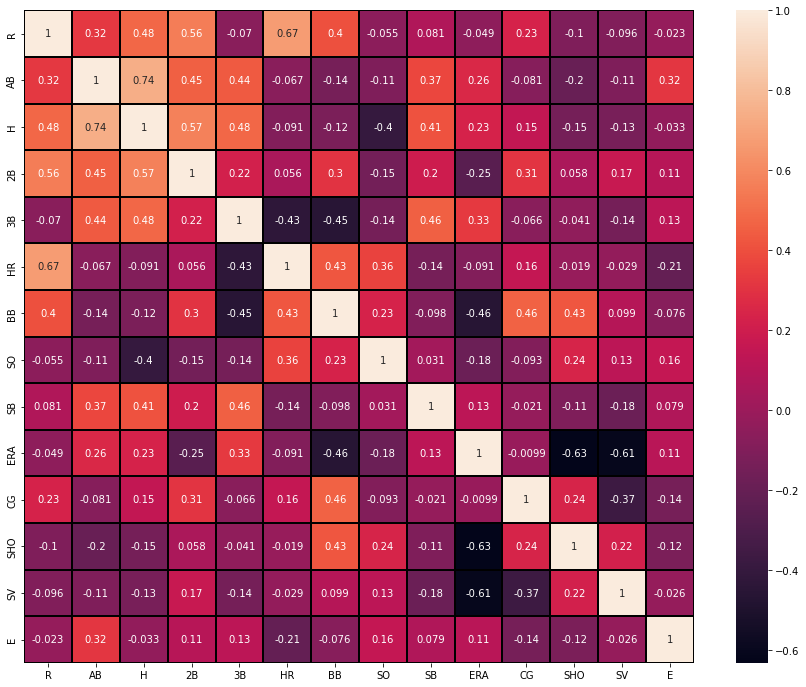

In [61]:
#checking in the heatmap
plt.figure(figsize=(15,12))
sns.heatmap(v.corr(), annot=True,linecolor='black', linewidths=.25)

Now all highly correlated features have been removed.

In [62]:
#checking the skewness
df.skew()

R      1.200786
AB     0.183437
H      0.670254
2B    -0.230650
3B     0.129502
HR     0.516441
BB     0.158498
SO    -0.156065
SB     0.479893
RA     0.045734
ER     0.058710
ERA    0.053331
CG     0.736845
SHO    0.565790
SV     0.657524
E      0.890132
W      0.047089
dtype: float64

# Outliers

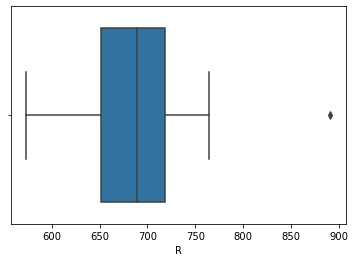

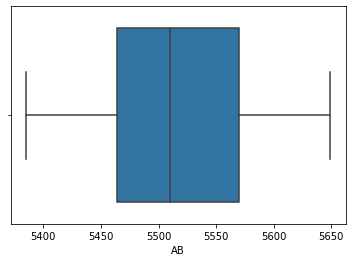

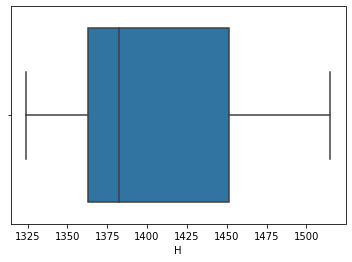

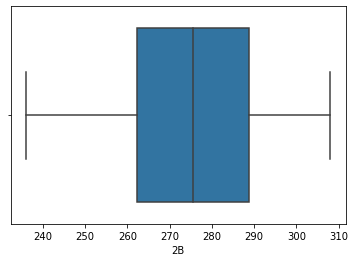

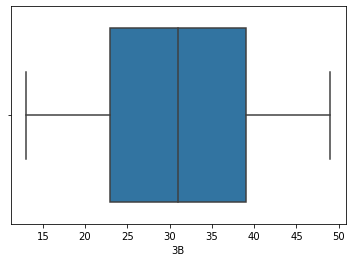

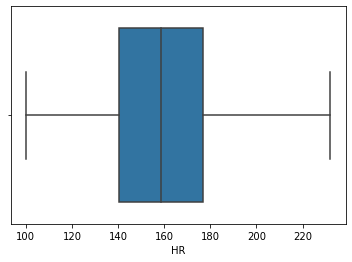

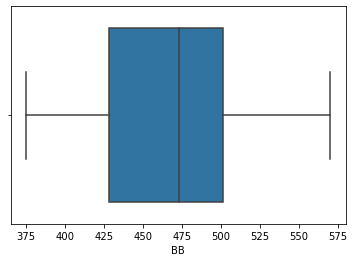

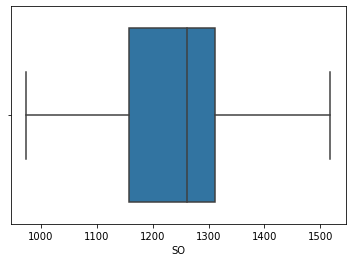

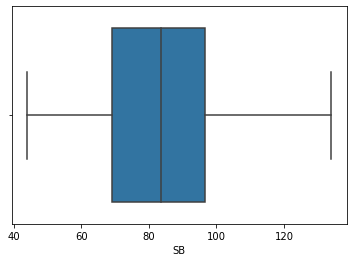

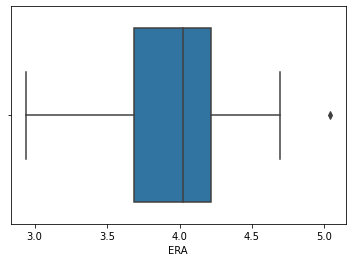

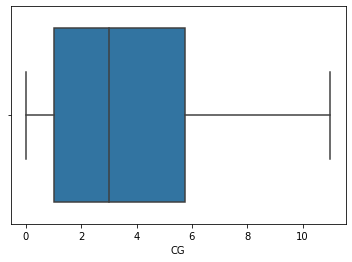

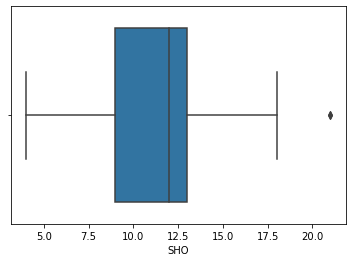

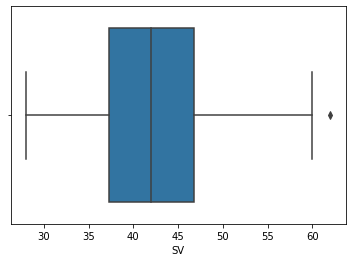

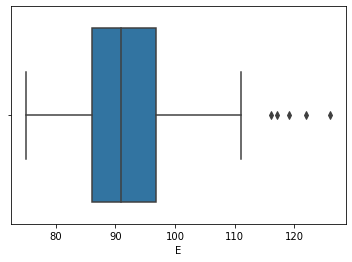

In [63]:
for i in v.columns:
    sns.boxplot(v[i])
    plt.show()

In [64]:
#Outliers are in upper range of features R , ERA , SHO , SV , E , lets handle them

In [66]:
v.columns

Index(['R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'ERA', 'CG', 'SHO',
       'SV', 'E'],
      dtype='object')

In [67]:
IQR= df['R'].quantile(.75)-df['R'].quantile(.25) #for Run
IQR
upper= df['R'].quantile(.75) +( 1.5 * IQR)
upper

818.75

In [68]:
v['R']= np.where(v['R']>upper,upper,v['R'])

In [69]:
IQR= df['ERA'].quantile(.75)-df['ERA'].quantile(.25) #for Earned Run average
IQR
upper= df['ERA'].quantile(.75) +( 1.5 * IQR)
upper

5.026250000000001

In [70]:
v['ERA']= np.where(v['ERA']>upper,upper,v['ERA'])

In [71]:
IQR= df['SHO'].quantile(.75)-df['SHO'].quantile(.25) #for ShutOuts
IQR
upper= df['SHO'].quantile(.75) +( 1.5 * IQR)
upper
v['SHO']= np.where(v['SHO']>upper,upper,v['SHO'])

In [72]:
IQR= df['SV'].quantile(.75)-df['SV'].quantile(.25)  #for Saves
IQR
upper= df['SV'].quantile(.75) +( 1.5 * IQR)
upper
v['SV']= np.where(v['SV']>upper,upper,v['SV'])

In [73]:
IQR= df['E'].quantile(.75)-df['E'].quantile(.25) #for Errors
IQR
upper= df['E'].quantile(.75) +( 1.5 * IQR)
upper
v['E']= np.where(v['E']>upper,upper,v['E'])

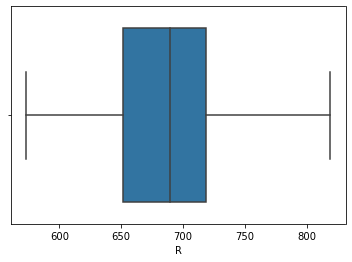

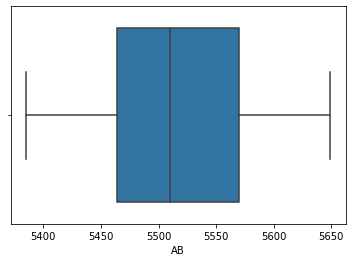

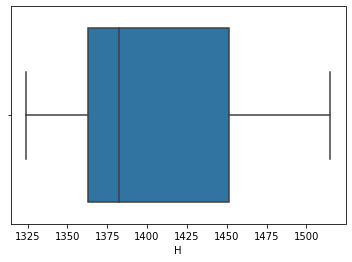

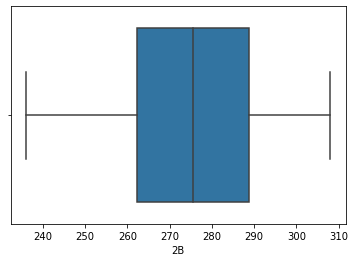

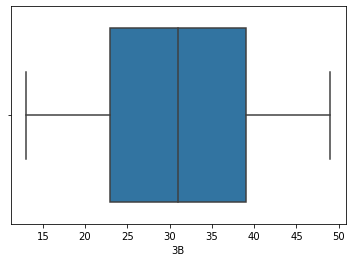

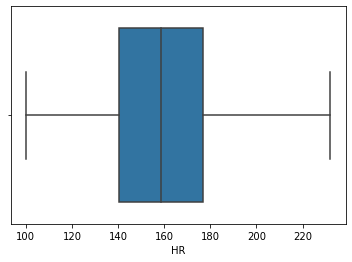

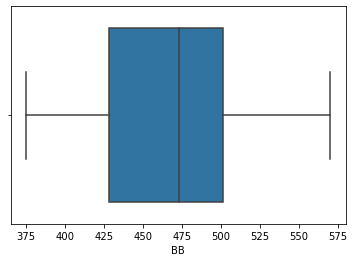

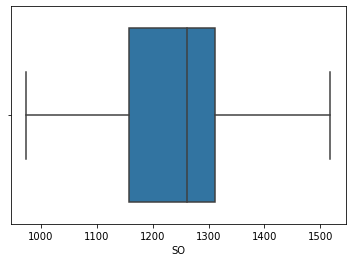

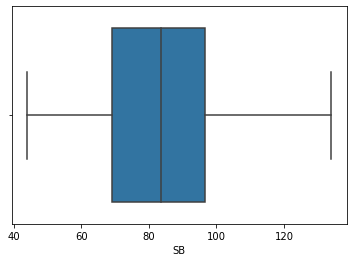

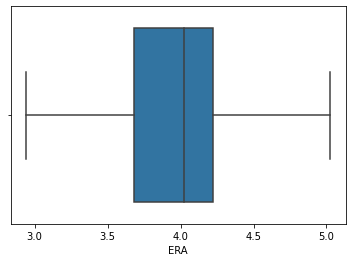

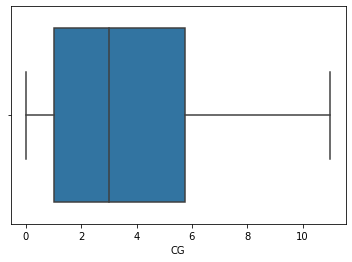

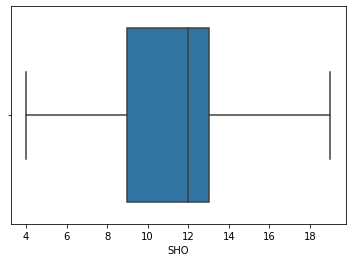

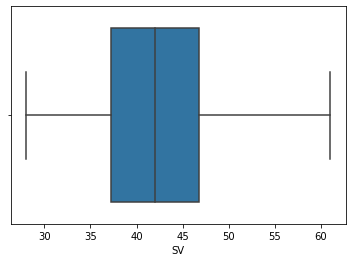

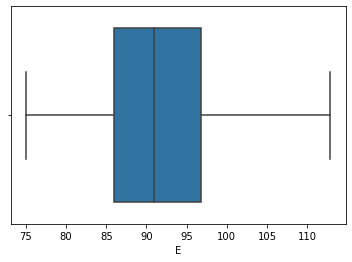

In [74]:
#checking the outliers again

for i in v.columns:
    sns.boxplot(v[i])
    plt.show()

The  outliers are handled

In [75]:
#checking the skewness again

v.skew()

R      0.284282
AB     0.183437
H      0.670254
2B    -0.230650
3B     0.129502
HR     0.516441
BB     0.158498
SO    -0.156065
SB     0.479893
ERA    0.037969
CG     0.736845
SHO    0.218030
SV     0.612333
E      0.504019
dtype: float64

After handling outliers, skewness has been removed as well

# Transformation

In [76]:
from sklearn.preprocessing import power_transform
transformed=power_transform(v)

In [77]:
transformed=pd.DataFrame(transformed)
transformed.columns=v.columns

In [78]:
transformed.skew()

R      0.000000
AB     0.000000
H      0.000000
2B    -0.035315
3B    -0.072933
HR    -0.000065
BB    -0.007760
SO     0.041170
SB    -0.010455
ERA    0.001204
CG    -0.059785
SHO   -0.017889
SV     0.001270
E      0.032939
dtype: float64

In [79]:
transformed.head(2)

,R,AB,H,2B,3B,HR,BB,SO,SB,ERA,CG,SHO,SV,E
0,0.0,0.0,0.0,1.477685,1.033103,-0.764626,-1.610915,-2.569896,0.939708,-0.502797,-0.359844,-0.827928,1.564693,-0.357505
1,0.0,0.0,0.0,0.084269,1.203320,-0.158581,-0.502749,0.134913,-0.539693,0.261440,-0.359844,0.258244,0.361185,-0.560947


The skewness has been removed

# Standardization

In [80]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
scaled=sc.fit_transform(transformed)

# Seprate independent and dependent features

In [81]:
X= scaled

In [82]:
Y=df['W']

In [83]:
X.shape

(30, 14)

In [84]:
Y.shape

(30,)

# Machine Learning Process

In [86]:
#Its a Regression problem coz output variable have continuous data, sales prediction

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [87]:
LR= LinearRegression()

In [88]:
#Train Test Split / finding best random_state for my model

for i in range(0,200):
    x_train,x_test,y_train,y_test= train_test_split(X,Y,random_state=i,test_size=.2)
    LR.fit(x_train,y_train)
    train_pred=LR.predict(x_train)
    test_pred=LR.predict(x_test)
    if round(r2_score(y_test,test_pred),2)==round(r2_score(y_train,train_pred),2):
        print("At random state ", i, "The model performance very well")
        print("At random state: ",i)
        print("Test R2 score is: ", round(r2_score(y_test,test_pred),2))
        print('Train R2 score is: ', round(r2_score(y_train,train_pred),2))
        print('X'*50,'\n')

At random state  30 The model performance very well
At random state:  30
Test R2 score is:  0.84
Train R2 score is:  0.84
XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX 

At random state  47 The model performance very well
At random state:  47
Test R2 score is:  0.85
Train R2 score is:  0.85
XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX 

At random state  99 The model performance very well
At random state:  99
Test R2 score is:  0.85
Train R2 score is:  0.85
XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX 

At random state  175 The model performance very well
At random state:  175
Test R2 score is:  0.86
Train R2 score is:  0.86
XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX 



In [89]:
#Select Random state= 175
x_train,x_test,y_train,y_test= train_test_split(X,Y,random_state=175,test_size=.2)
LR.fit(x_train,y_train)

LinearRegression()

In [90]:
LinearRegression()

LinearRegression()

In [105]:
!pip install xgboost

In [106]:
#importing the required libraries
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import SGDRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [108]:
LR_model= LinearRegression()
RD_model= Ridge()
LS_model= Lasso()
DT_model= DecisionTreeRegressor()
SV_model= SVR()
KNR_model= KNeighborsRegressor()
XGB_model= XGBRegressor()
RFR_model= RandomForestRegressor()
Elastic_model= ElasticNet()
SGH_model= SGDRegressor()
Bag_model=BaggingRegressor()
ADA_model=AdaBoostRegressor()
GB_model= GradientBoostingRegressor()

model=[LR_model,RD_model,LS_model,DT_model,SV_model,KNR_model,RFR_model,XGB_model,Elastic_model,SGH_model,Bag_model,ADA_model,GB_model ]

In [109]:
for m in model:
    m.fit(x_train,y_train)
    print('mean_absolute_error of ',m ,'model', mean_absolute_error(y_test,m.predict(x_test)))
    print('mean_square_error of',m,'model' , mean_squared_error(y_test,m.predict(x_test)))
    print('R2 Score of',m,'model', r2_score(y_test,m.predict(x_test) )*100)
    print('X' * 50, '\n\n')

mean_absolute_error of  LinearRegression() model 2.7264065961746673
mean_square_error of LinearRegression() model 13.319637960999827
R2 Score of LinearRegression() model 86.25266724208733
XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX 


mean_absolute_error of  Ridge() model 2.294706185531917
mean_square_error of Ridge() model 11.152294329870855
R2 Score of Ridge() model 88.48960447605072
XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX 


mean_absolute_error of  Lasso() model 2.851798496410254
mean_square_error of Lasso() model 9.180635618736224
R2 Score of Lasso() model 90.524573329286
XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX 


mean_absolute_error of  DecisionTreeRegressor() model 7.0
mean_square_error of DecisionTreeRegressor() model 69.0
R2 Score of DecisionTreeRegressor() model 28.784403669724778
XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX 


mean_absolute_error of  SVR() model 8.005345608904014
mean_square_error of SVR() model 91.1232721063577
R2 Score of 

# CROSS VALIDATION

In [96]:
from sklearn.model_selection import cross_val_score

In [97]:
for i in model:
    print('mean_square of ',i, 'model',mean_squared_error(y_test,i.predict(x_test)))
    print("cross Validation score of ",i ," is ",cross_val_score(i,X,Y,cv=10, scoring='neg_mean_squared_error').mean())
    print('*'*50)

mean_square of  LinearRegression() model 13.319637960999827
cross Validation score of  LinearRegression()  is  -55.10832658669832
**************************************************
mean_square of  Ridge() model 11.152294329870855
cross Validation score of  Ridge()  is  -47.703110230419824
**************************************************
mean_square of  Lasso() model 9.180635618736224
cross Validation score of  Lasso()  is  -38.00120143901657
**************************************************
mean_square of  DecisionTreeRegressor() model 147.33333333333334
cross Validation score of  DecisionTreeRegressor()  is  -108.03333333333333
**************************************************
mean_square of  SVR() model 91.1232721063577
cross Validation score of  SVR()  is  -101.43654219683
**************************************************
mean_square of  KNeighborsRegressor() model 55.53999999999997
cross Validation score of  KNeighborsRegressor()  is  -80.90266666666668
***********************

In [99]:
for i in model:
    print('Root mean_square of ',i, 'model',np.sqrt(mean_squared_error(y_test,i.predict(x_test))))
    score=cross_val_score(i,X,Y,cv=10, scoring='neg_mean_squared_error').mean()
    print("cross Validation score of root mean square ",i ," is ",np.sqrt(-score))
    print('*'*50)

Root mean_square of  LinearRegression() model 3.649607918804406
cross Validation score of root mean square  LinearRegression()  is  7.42349827148214
**************************************************
Root mean_square of  Ridge() model 3.3395051025370295
cross Validation score of root mean square  Ridge()  is  6.906743822556315
**************************************************
Root mean_square of  Lasso() model 3.029956372414663
cross Validation score of root mean square  Lasso()  is  6.164511451771062
**************************************************
Root mean_square of  DecisionTreeRegressor() model 12.138094304022083
cross Validation score of root mean square  DecisionTreeRegressor()  is  10.269696522617728
**************************************************
Root mean_square of  SVR() model 9.545851041492199
cross Validation score of root mean square  SVR()  is  10.071570989514496
**************************************************
Root mean_square of  KNeighborsRegressor() model 7.4

# Hypertuning of XGBRegressor

In [110]:
from sklearn.model_selection import GridSearchCV

In [111]:
params= {"learning_rate"    : [0.01,.05,.1,.2,.3,.5 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.01, 0.05,0.1, 0.2 , 0.3],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ] }

In [112]:
GCV= GridSearchCV(XGB_model,params,cv=5,scoring='neg_mean_squared_error', n_jobs=-1)
GCV.fit(x_train,y_train)

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    callbacks=None, colsample_bylevel=1,
                                    colsample_bynode=1, colsample_bytree=1,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    gamma=0, gpu_id=-1, grow_policy='depthwise',
                                    importance_type=None,
                                    interaction_constraints='',
                                    learning_rate=0.300000012, max_bin=256,
                                    max_cat...
                                    monotone_constraints='()', n_estimators=100,
                                    n_jobs=0, num_parallel_tree=1,
                                    predictor='auto', random_state=0,
                                    reg_alpha=0, reg_lambda=1, ...),
     

In [113]:
GCV_pred=GCV.best_estimator_.predict(x_test)
mean_squared_error(y_test,GCV_pred)


76.23911029390486

The error has been reduced to 76 from 81.98

# Saving model in pickle format

In [114]:
import joblib
joblib.dump(GCV.best_estimator_,"Baseball.pkl")

['Baseball.pkl']